Using Random Forest for prediction of Graduate Admissions from an Indian perspective.

https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv



In [ ]:
import pandas as pd

admission_data = pd.read_csv('datasets_14872_228180_Admission_Predict_Ver1.1.csv')
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# To do:



1.   Clean Data:

*   Check null values
*   Take out big outliners 
*   Check Data consistency


2.   Remove Serial No. It is a duplicate of the index.
1.   Histogram the columns to observe if there are gaussian distributions. If they are use StandardScaler (Standardization) If not Normalize.
1.   Create categorical value for 'Chance of Admit' if >69 it is admitted (Yes) else is rejected (No)
2.   Prepare data for Alg.

*   Check for imbalanced classes (and fix it)
*   Separate Train and test data

6.   Train and show results
7.   Do the same with only normalize





















## Clean data

In [ ]:
admission_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


No Null data.
NO big outliners.
Data is consistence.

## Remove Serial No. It is a duplicate of the index.

In [ ]:
# dropping "serial No." column
data = admission_data.drop('Serial No.', axis = 1)
data.columns.values.tolist()

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

## Histogram the columns... Normalize / Standardize Data

''


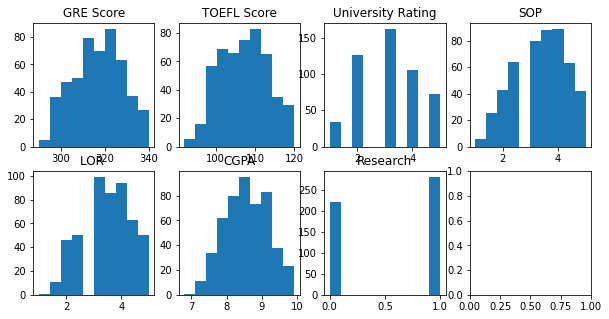

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating subplots histograms of each column
img, axs = plt.subplots(2,4, figsize=(10,5))

# Array to plot using for
aux = np.full(axs.size,"",dtype=object)
aux[0:data.columns[:-1].size] = data.columns[:-1]
aux = aux.reshape(axs.shape)

for ax, ux in zip(axs, aux):
  for a, x in zip(ax, ux):
    try:
      a.hist(data[x])
      a.title.set_text(x)
    except Exception as e:
      print(e)

Standardize columns:

*   GRE Score
*   TOEFL Score
*   CGPA




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
columns_sta = scaler.fit_transform(data.iloc[:,[0,1,5]])

columns_sta

array([[ 1.81923762,  1.77886545,  1.77680627],
       [ 0.66714832, -0.03160087,  0.48585943],
       [-0.0418297 , -0.52536441, -0.95404281],
       ...,
       [ 1.19888185,  2.10804114,  1.62785086],
       [-0.39631872, -0.68995225, -0.24236699],
       [ 0.93301508,  0.95592621,  0.76721964]])

Normalize columns.

All columns except:
*    Research (Is a binary value)
*   'Chance of admit' will be turn into category later.







In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
columns_norm = scaler.fit_transform(data.iloc[:,:-2])

columns_norm

array([[0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
        0.91346154],
       [0.68      , 0.53571429, 0.75      , 0.75      , 0.875     ,
        0.66346154],
       [0.52      , 0.42857143, 0.5       , 0.5       , 0.625     ,
        0.38461538],
       ...,
       [0.8       , 1.        , 1.        , 0.875     , 1.        ,
        0.88461538],
       [0.44      , 0.39285714, 0.75      , 0.75      , 1.        ,
        0.5224359 ],
       [0.74      , 0.75      , 0.75      , 0.875     , 0.875     ,
        0.71794872]])

Create two data sets. One with only normalize columns
the other with 3 Standarized.

In [ ]:
data_norm = data.copy(deep=True)
data_norm = pd.DataFrame(columns_norm, columns=data.columns[:-2])
data_norm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,0.94,0.928571,0.75,0.875,0.875,0.913462
1,0.68,0.535714,0.75,0.750,0.875,0.663462
2,0.52,0.428571,0.50,0.500,0.625,0.384615
3,0.64,0.642857,0.50,0.625,0.375,0.599359
4,0.48,0.392857,0.25,0.250,0.500,0.451923


Create a copy of the normalize Data and replace the standardized columns.

In [ ]:
#Deep copy from Normalized vector
data_stan = data_norm.copy(deep=True)

#Create a DataFrame from the standardized columns to be able to use Pandas.Update
df_stan_columns = pd.DataFrame(columns_sta, columns=data.columns[[0,1,5]])

#Replace the Standardized columns
data_stan.update(df_stan_columns)

data_stan.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.819238,1.778865,0.75,0.875,0.875,1.776806
1,0.667148,-0.031601,0.75,0.750,0.875,0.485859
2,-0.041830,-0.525364,0.50,0.500,0.625,-0.954043
3,0.489904,0.462163,0.50,0.625,0.375,0.154847
4,-0.219074,-0.689952,0.25,0.250,0.500,-0.606480


## Create categorical for label

In [ ]:
y = data.iloc[:,-1]
y = y.rename('y')
y.loc[y[:]>=0.7] = 1
y.loc[y[:]<0.7] = 0
y.value_counts()


1.0    300
0.0    200
Name: y, dtype: int64

## Prepare data for Alg.

In [ ]:
data_norm = data_norm.join(data['Research']).join(y)
data_stan = data_stan.join(data['Research']).join(y)
print(f'Columns in Normalized data: {data_norm.columns.tolist()}. shape{data_norm.shape}')
print(f'Columns in Standardize data: {data_stan.columns.tolist()}. shape{data_stan.shape}')

Columns in Normalized data: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'y']. shape(500, 8)
Columns in Standardize data: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'y']. shape(500, 8)


Check for inbalanced classes and fix it

In [ ]:
print(data_norm['y'].value_counts())
print(data_stan['y'].value_counts())
feature_list = data_norm.columns[:-1].tolist()


1.0    300
0.0    200
Name: y, dtype: int64
1.0    300
0.0    200
Name: y, dtype: int64


In [ ]:
# Separate data and Labels

x_norm = data_norm.iloc[:,:-1]
x_stan = data_stan.iloc[:,:-1]

y_norm = data_norm['y']
y_stan = data_stan['y']

print(x_norm.columns.values, y_norm.name)

print(x_stan.columns.values, y_stan.name)




['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research'] y
['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research'] y


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


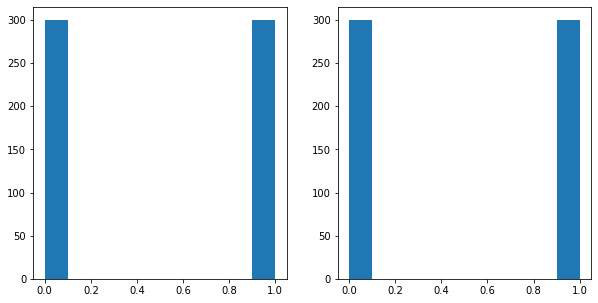

In [ ]:
# Fix imbalance data
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = x_norm.columns
# oversample normalized data
os_x_norm, os_y_norm = os.fit_sample(x_norm, y_norm)
os_x_norm = pd.DataFrame(data=os_x_norm, columns=columns )
os_y_norm= pd.DataFrame(data=os_y_norm, columns=['y'])

# oversample standardized data
os_x_stan, os_y_stan = os.fit_sample(x_stan, y_stan)
os_x_stan = pd.DataFrame(data=os_x_stan, columns=columns)
os_y_stan = pd.DataFrame(data=os_y_stan, columns=['y'])


fig, axs = plt.subplots(1,2, figsize = (10,5))

axs[0].hist(os_y_norm.values)
axs[1].hist(os_y_stan.values)
plt.show()

Separate Training a testing data

In [ ]:
from sklearn.model_selection import train_test_split

# Normalized Data
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(os_x_norm, os_y_norm, test_size=0.3, random_state=0)

# Standardized Data
x_stan_train, x_stan_test, y_stan_train, y_stan_test = train_test_split(os_x_stan, os_y_stan, test_size=0.3, random_state=0)


## Train and show results

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_norm = RandomForestRegressor(n_estimators=100, random_state=0)
RF_norm.fit(x_norm_train, np.ravel(y_norm_train))
y_norm_pred = RF_norm.predict(x_norm_test)
print(f'Accuracy of Normalize data using Random Forest on test set:{round(RF_norm.score(x_norm_test, y_norm_test),2)}')


RF_stan = RandomForestRegressor(n_estimators=100, random_state=0)
RF_stan.fit(x_stan_train, np.ravel(y_stan_train))
y_stan_pred = RF_norm.predict(x_stan_test)
print(f'Accuracy of Standarized data using Random Forst on test set:{round(RF_norm.score(x_stan_test, y_stan_test),2)}')

Accuracy of Normalize data using Random Forest on test set:0.64
Accuracy of Standarized data using Random Forst on test set:0.15


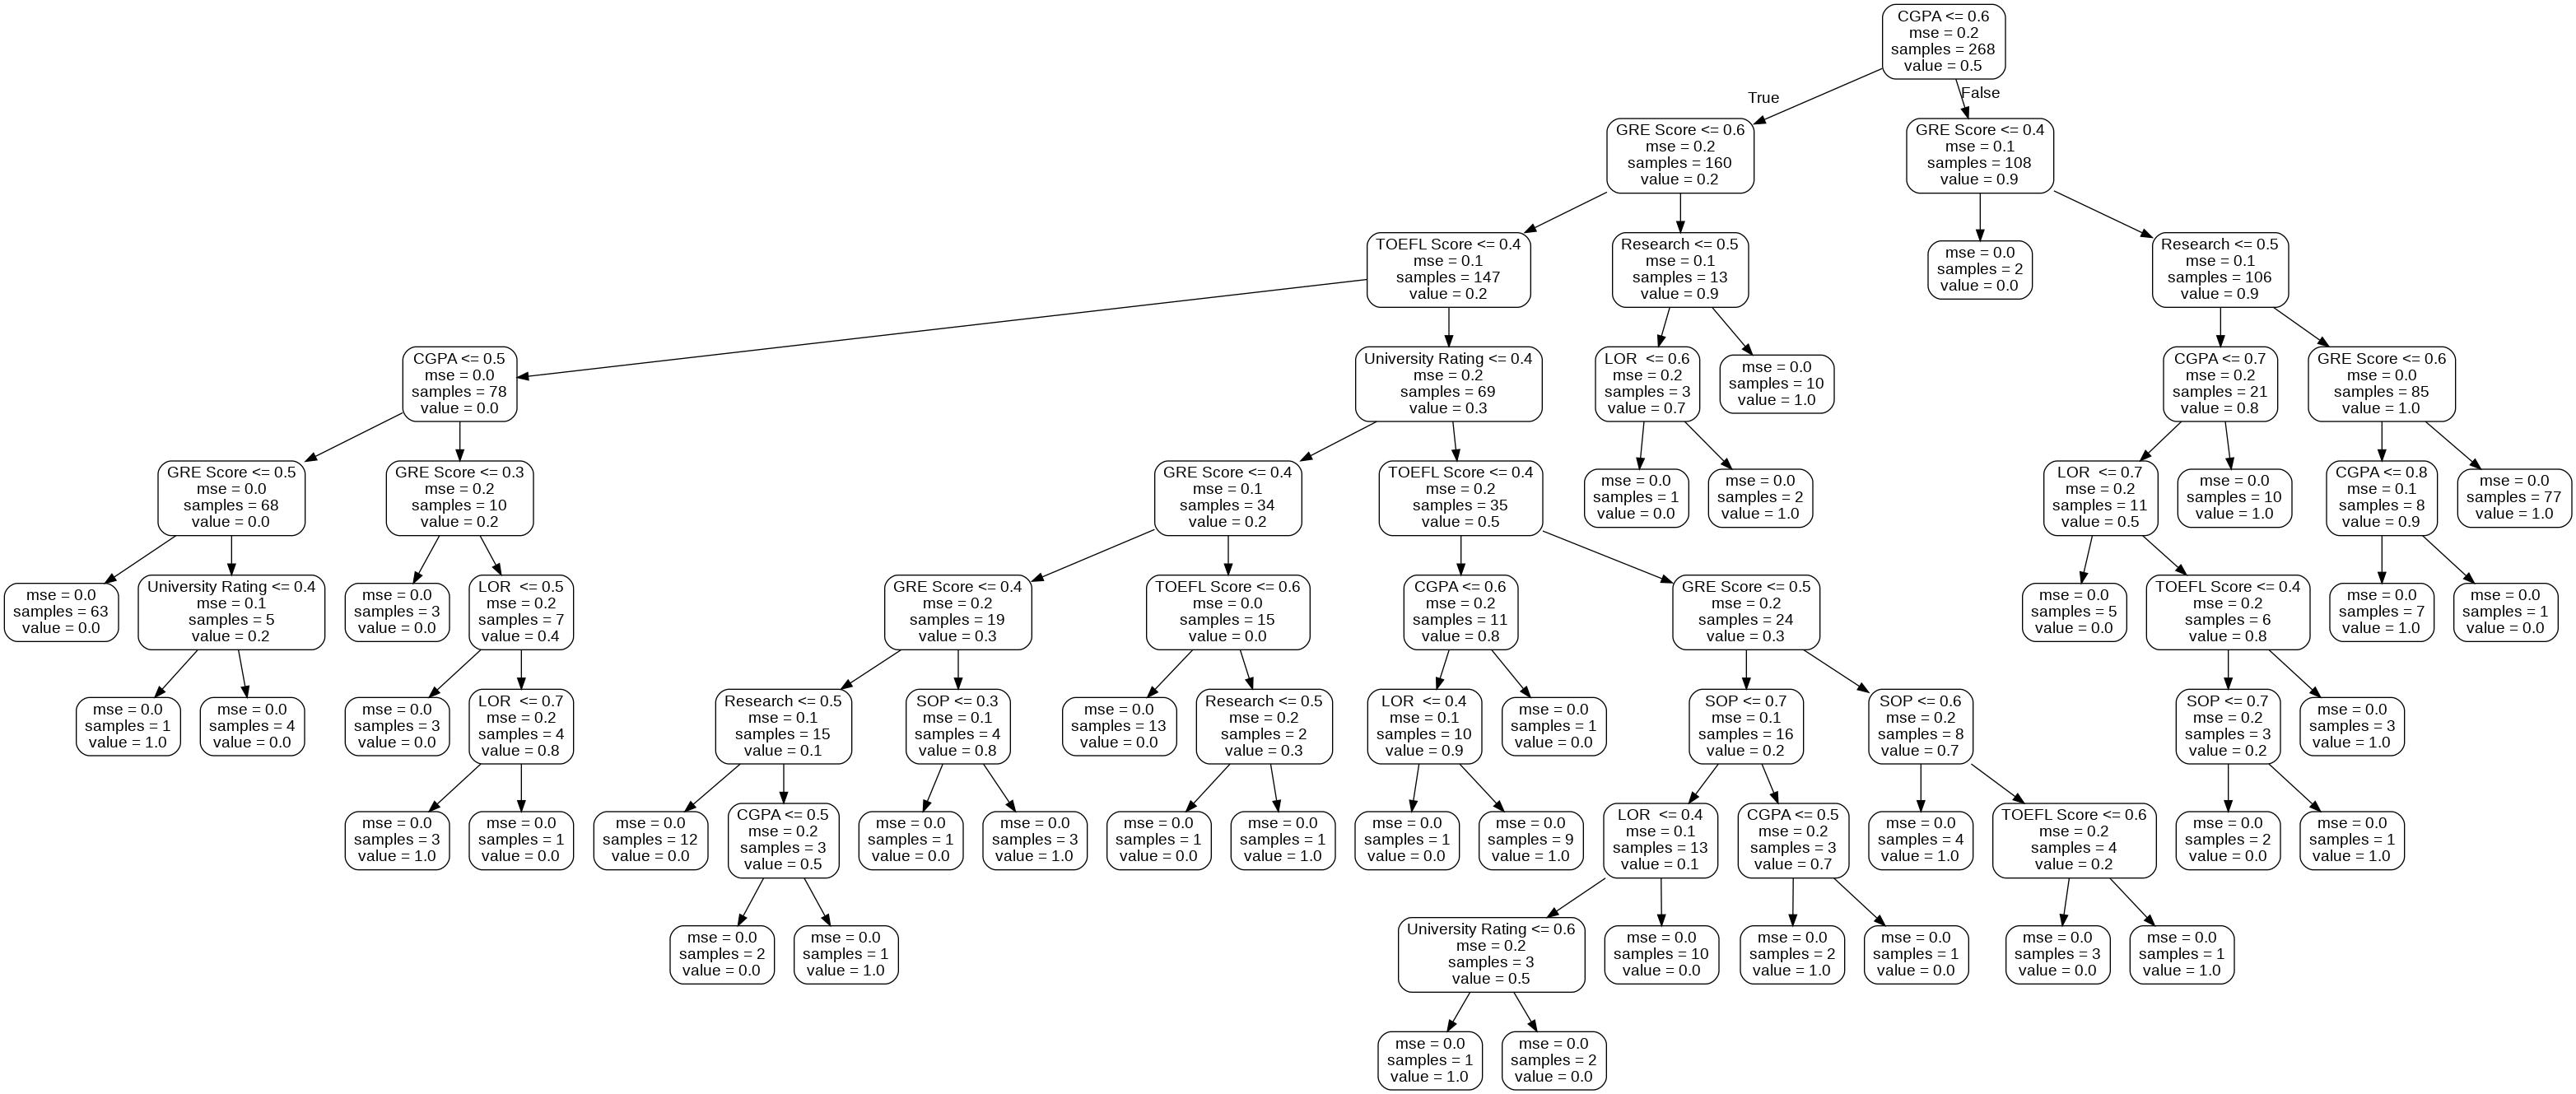

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = RF_norm.estimators_[5]
# Import tools needed for visualization

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = RF_norm.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = data_norm.columns.tolist()[:-1], rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

from IPython.display import Image
Image('tree.png')

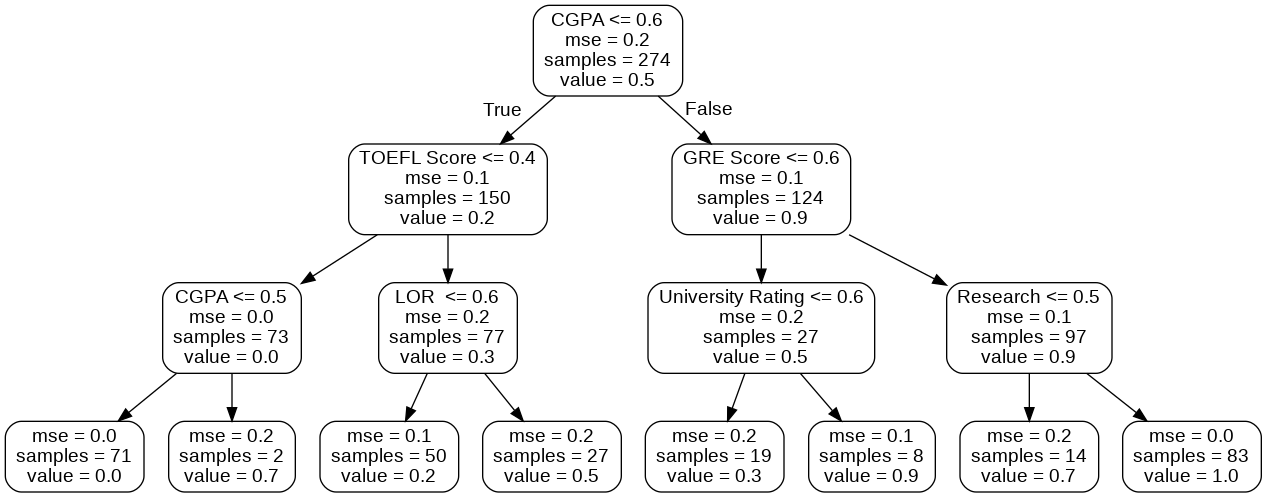

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=100, max_depth = 3)
rf_small.fit(x_norm_train, np.ravel(y_norm_train))
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = data_norm.columns.tolist()[:-1], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
Image('small_tree.png')

In [ ]:
# Get numerical feature importances
importances = list(RF_norm.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CGPA                 Importance: 0.49
Variable: GRE Score            Importance: 0.27
Variable: TOEFL Score          Importance: 0.08
Variable: LOR                  Importance: 0.07
Variable: SOP                  Importance: 0.04
Variable: University Rating    Importance: 0.03
Variable: Research             Importance: 0.02
